# Figure 1 #
Here, we plot the eRMSD and RMSD over time as shown in figure 1. We color the different datapoints according to the annotation: blue if the stem is formed and red if the stem is formed and the non-canonical interaction between U6-G9 is present. 
The first step is to read the pickles:


In [1]:
import pickle 

# read ermds pickle
fname = "ermsd.p"
print "# reading pickle %s" % fname, 
ermsd = pickle.load(open(fname, "r"))
print " -  shape ", ermsd.shape

# Read rmsd pickle
fname = "rmsd.p"
print "# reading pickle %s" % fname,
rmsd = pickle.load(open(fname, "r"))
print " - shape ", rmsd.shape

# Read annotation pickle
fname = "pairs.p"
print "# reading pickle %s" % fname, 
pairings,res = pickle.load(open(fname, "r"))
print " - shape ", len(pairings)

# Read dotbracket pickle
fname = "dotbracket.p"
print "# reading pickle %s" % fname,
dotbr,res = pickle.load(open(fname, "r"))
print " - shape ", len(dotbr)


# reading pickle ermsd.p  -  shape  (20000,)
# reading pickle rmsd.p  - shape  (20000,)
# reading pickle pairs.p  - shape  20000
# reading pickle dotbracket.p  - shape  20000


Now we create a list of length n=20000, where n is the lenght of the simulation. The entry is 2 if the stem is formed and SWt present, 1 if stem is formed and 0 otherwise. 

In [2]:

# bin structures according to annotation:
# bins_anno[j] = 2 if stem is formed and SWt present
# bins_anno[j] = 1 if stem is formed
# bins_anno[j] = 0 otherwise
bins_anno = [0]*len(pairings)
for j in range(0,len(pairings)):
    # if the stem is fully formed add 1
    if(dotbr[j] == "(((((....)))))"):
        bins_anno[j] += 1
        # search through the list if SWt between U6 and G9 is present. 
        for p in range(len(pairings[j][0])):
            res1 = res[pairings[j][0][p][0]]
            res2 = res[pairings[j][0][p][1]]
            interaction =  pairings[j][1][p]
            if(res1=="U_6_0" and res2=="G_9_0" and interaction=="SWt"):
                bins_anno[j] += 1



We are now ready to plot the data: time series and histogram on the right. 

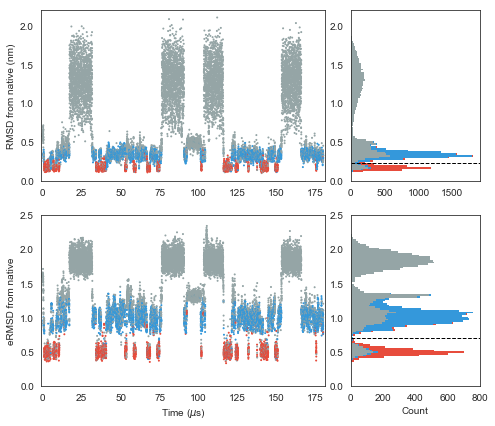

In [4]:
# Import numpy, matbplotlib and seaborn. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# define colors: gray, blue and red  
flatui = [ "#95a5a6", "#3498db", "#e74c3c"]
cmap = sns.color_palette(flatui)
col = [flatui[j] for j in bins_anno]

# define figure size 
plt.figure(figsize=(7,6))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.97, top=0.97,
                wspace=None, hspace=None)
ax1 = plt.subplot2grid((2, 3), (1, 0), colspan=2)

# plot eRMSD over time 
xx = np.linspace(0,180,ermsd.shape[0])
ax1.scatter(xx,ermsd,c=col,s=1)

# set limits and labels
ax1.set_xlim(-1,181)
ax1.set_ylabel("eRMSD from native")
ax1.set_ylim(0,2.5)
ax1.set_xlabel(r"Time ($\mu$s)")

# Define new axis and do histograms for the three categories 
ax2 = plt.subplot2grid((2, 3), (1, 2))
bins = np.linspace(0,2.5,100)
hh1,ee1 = np.histogram([ermsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==0],bins=bins)
hh2,ee2 = np.histogram([ermsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==1],bins=bins)
hh3,ee3 = np.histogram([ermsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==2],bins=bins)
# do horizontal barplot with left padding
ax2.barh(0.5*(ee1[1:]+ee1[:-1]),hh1,color=flatui[0],height=0.026,linewidth=0)
ax2.barh(0.5*(ee1[1:]+ee1[:-1]),hh2,color=flatui[1],height=0.026,left=hh1,linewidth=0)
ax2.barh(0.5*(ee1[1:]+ee1[:-1]),hh3,color=flatui[2],height=0.026,left=hh1+hh2,linewidth=0)
# set labels, limits
ax2.set_xlabel("Count")
ax2.set_ylim(0,2.5)
# draw line at eRMSD = 0.7
ax2.axhline(0.7,ls='--',c='k',lw=1)

# now do the same as above, but for RMSD
ax3 = plt.subplot2grid((2, 3), (0, 0), colspan=2)
# plot time series
ax3.scatter(xx,rmsd,c=col,s=1)
ax3.set_xlim(-1,181)
ax3.set_ylim(0,2.2)
ax3.set_ylabel("RMSD from native (nm)")

# histogram 
ax4 = plt.subplot2grid((2, 3), (0, 2))
bins = np.linspace(0,2.2,100)
hh1,ee1 = np.histogram([rmsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==0],bins=bins)
hh2,ee2 = np.histogram([rmsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==1],bins=bins)
hh3,ee3 = np.histogram([rmsd[e] for e in range(ermsd.shape[0]) if bins_anno[e]==2],bins=bins)
ax4.barh(0.5*(ee1[1:]+ee1[:-1]),hh1,color=flatui[0],height=0.025,linewidth=0)
ax4.barh(0.5*(ee1[1:]+ee1[:-1]),hh2,color=flatui[1],height=0.025,left=hh1,linewidth=0)
ax4.barh(0.5*(ee1[1:]+ee1[:-1]),hh3,color=flatui[2],height=0.025,left=hh1+hh2,linewidth=0)

# set limits and draw line at 0.23 nm
ax4.axhline(0.23,ls='--',c='k',lw=1)
ax4.set_ylim(0,2.2)

plt.show()
#plt.savefig("figure1.png",dpi=600)
